Epoch 1/100
0s - loss: 0.0589
Epoch 2/100
0s - loss: 0.0325
Epoch 3/100
0s - loss: 0.0205
Epoch 4/100
0s - loss: 0.0166
Epoch 5/100
0s - loss: 0.0146
Epoch 6/100
0s - loss: 0.0138
Epoch 7/100
0s - loss: 0.0133
Epoch 8/100
0s - loss: 0.0126
Epoch 9/100
0s - loss: 0.0120
Epoch 10/100
0s - loss: 0.0115
Epoch 11/100
0s - loss: 0.0107
Epoch 12/100
0s - loss: 0.0101
Epoch 13/100
0s - loss: 0.0094
Epoch 14/100
0s - loss: 0.0086
Epoch 15/100
0s - loss: 0.0078
Epoch 16/100
0s - loss: 0.0071
Epoch 17/100
0s - loss: 0.0064
Epoch 18/100
0s - loss: 0.0057
Epoch 19/100
0s - loss: 0.0051
Epoch 20/100
0s - loss: 0.0047
Epoch 21/100
0s - loss: 0.0043
Epoch 22/100
0s - loss: 0.0041
Epoch 23/100
0s - loss: 0.0038
Epoch 24/100
0s - loss: 0.0036
Epoch 25/100
0s - loss: 0.0036
Epoch 26/100
0s - loss: 0.0035
Epoch 27/100
0s - loss: 0.0035
Epoch 28/100
0s - loss: 0.0035
Epoch 29/100
0s - loss: 0.0035
Epoch 30/100
0s - loss: 0.0034
Epoch 31/100
0s - loss: 0.0034
Epoch 32/100
0s - loss: 0.0034
Epoch 33/100
0s -

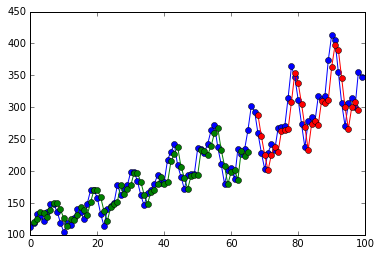

In [14]:
# LSTM for international airline passengers problem with window regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
import utils as ut
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = pandas.read_csv('./data/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
limit = 100
dataset = dataset[:limit]
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
split = 0.67
train_size = int(len(dataset) * split)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions

plt.plot(scaler.inverse_transform(dataset), '-o')
plt.plot(trainPredictPlot,'-o')
plt.plot(testPredictPlot,'-o')
plt.show()

Test Score: 32.5469 RMSE
Simple Score: 31.7231 RMSE
Train Score: 17.7560 RMSE


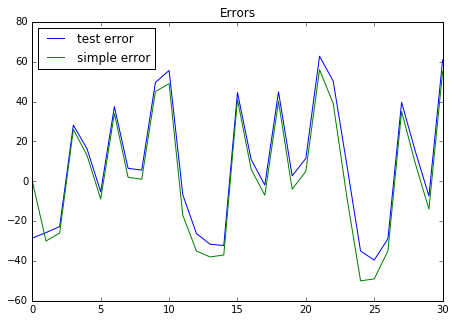

In [15]:
def calcmse (x, y):
    #Predictor comparison
    res = x - y
    res_e = np.sqrt(np.mean(res**2))
    #print(res_e)
    return res_e, res

simpletestY = np.roll(testY[0],1)
simpletestY[0] = simpletestY[1]

tr_e, tr_e_ar = calcmse(trainY[0], trainPredict[:,0])
te_e, te_e_ar = calcmse(testY[0], testPredict[:,0])
si_e, si_e_ar = calcmse(testY[0], simpletestY)

print ('Test Score: %.4f RMSE' % (te_e))
print ('Simple Score: %.4f RMSE' % (si_e))

print ('Train Score: %.4f RMSE' % (tr_e))

ut.figurefullwidth()
ut.subplot(1)
ut.subplottitle(1, "Errors")
plt.plot(te_e_ar, label="test error")
plt.plot(si_e_ar, label="simple error")
plt.legend(loc='best')